# Деревья решений. Случайный лес.

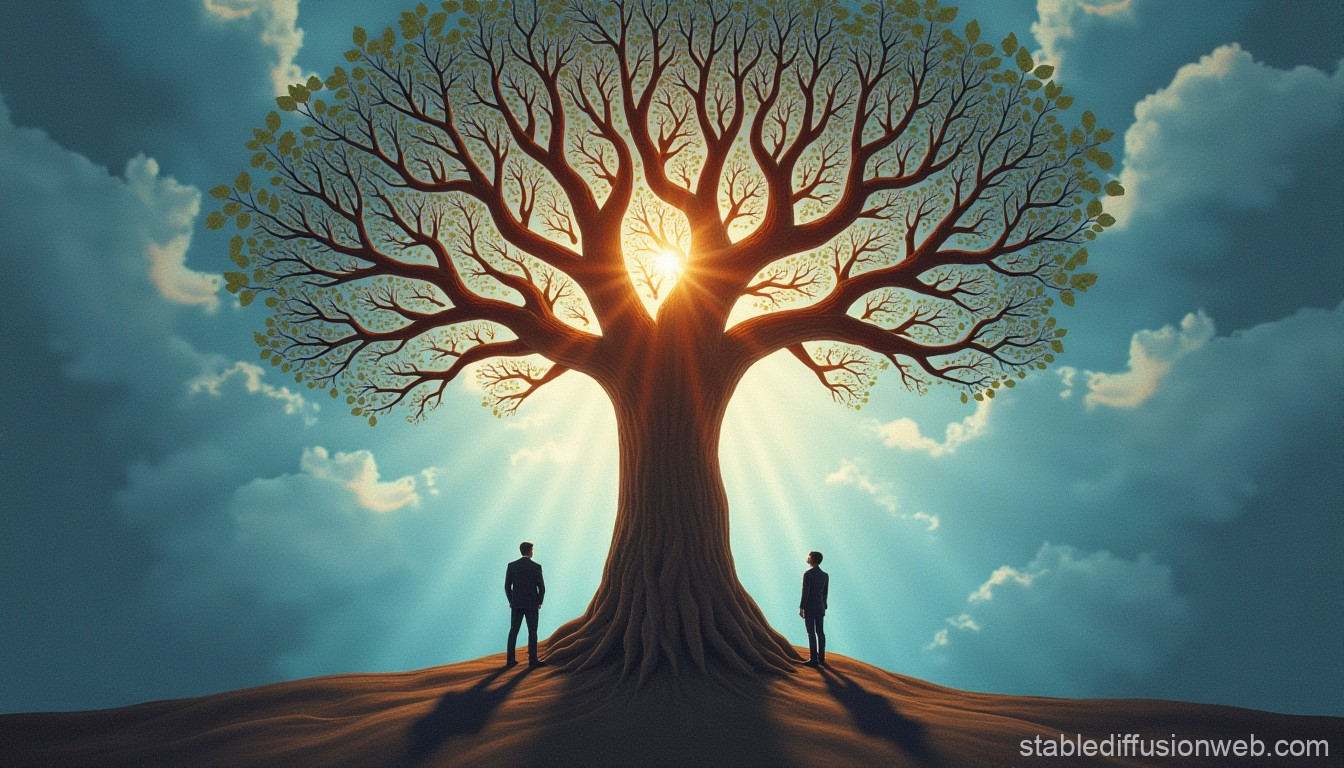

## Что мы изучим на этом занятии

* Деревья решений
    * Что такое дерево решений?
    * Как построить дерево решений?
    * Прирост информации (Information Gain)
    * Индекс Джини (Gini Index)
    * Классификация с помощью дерева решений
    * Регрессия с помощью дерева решений
* Случайный лес
    * Ансамбли моделей
    * Что такое случайный лес?
    * Как работает случайный лес?
    * Классификация с помощью случайного леса
    * Регрессия с помощью случайного леса

## Деревья решений (Decision Tree)

### Что такое дерево решений?

Иногда при создании интеллектуальных систем могут потребоваться пару вещей: точность предсказаний и интерпретируемость решений. Деревья решений предоставляют такие возможности.

Например, мы построить вот такое дерево решений для того, чтобы определить стоит ли страховать клиента или нет:

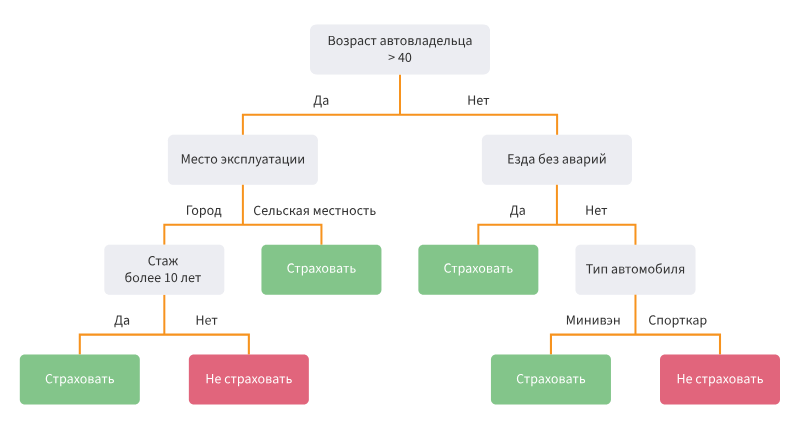

[Источник](https://loginom.ru/blog/decision-tree-p1)

Дерево решений — это простой и наглядный алгоритм машинного обучения, который используется как для задач классификации, так и для задач регрессии. Он работает по принципу ветвления, где каждый узел представляет собой проверку условия, а каждая ветвь — результат этой проверки. Листовые узлы содержат итоговое решение.

Дерево решений состоит из следующих компонентов:

* **Корневой узел.** Это начальный узел, с которого начинается построение дерева. В этом узле происходит первое разбиение данных по какому-то признаку.

* **Внутренние узлы.** Каждый такой узел — это проверка условия по одному из признаков. Например, условие может быть таким: "Возраст > 18?". В зависимости от результата (да или нет), данные делятся на две группы, и процесс продолжается.

* **Листовые узлы.** Это конечные узлы дерева, которые содержат ответ (класс, если это задача классификации, или числовое значение, если это задача регрессии).

### Как построить дерево решений?

Основная цель при построении дерева — это разделить данные на подмножества так, чтобы в каждом из них объекты принадлежали максимально к одному классу (для классификации) или были близки по значению (для регрессии). Алгоритм построения дерева решений работает рекурсивно, начиная с корневого узла и заканчивая листовыми узлами.

1. **Инициализация**

    Начинаем с набора обучающих данных. Каждый объект описывается набором признаков и имеет метку класса (для классификации) или числовое значение (для регрессии).
   
2. **Выбор признака для разбиения**

    На каждом этапе необходимо выбрать один признак, по которому будем делить данные. Для этого оцениваем, какой признак лучше всего разделяет данные. В задачах классификации обычно используется *индекс Джини* или *энтропия*, а в задачах регрессии — *среднеквадратичная ошибка*. Разбиение выбирается так, чтобы минимизировать значение метрики (чем ниже значение, тем "чище" разбиение).

3. **Разделение данных**

    На основе выбранного признака данные делятся на две (или больше) подмножества. Это создает две ветви дерева. Например, если признак — это возраст, данные могут разделиться на группы "Возраст > 30" и "Возраст ≤ 30".

4. **Рекурсивное разбиение**:

    Для каждого полученного подмножества повторяем процесс разбиения (шаги 2 и 3). Это продолжается до тех пор, пока все объекты в подмножестве не будут принадлежать одному классу (для классификации) или дерево не достигнет заранее заданной глубины.

5. **Критерий остановки**:

    Дерево не строится бесконечно. Процесс останавливается, если выполняется одно из условий:
     - Все объекты в подмножестве принадлежат одному классу.
     - Количество объектов в подмножестве меньше заданного порога.
     - Достигнута максимальная глубина дерева.
     - Признаки больше не могут разделять данные (разбиение не улучшает метрику).

6. **Присвоение метки классу (или значению)**:

    Когда дальнейшее разбиение невозможно или нецелесообразно, в листовом узле присваивается метка класса (для классификации) или усредненное значение (для регрессии). Для классификации это может быть наиболее частый класс в подмножестве, а для регрессии — среднее значение целевой переменной.

После завершения этих шагов дерево решений будет готово. Теперь для нового объекта можно начать с корневого узла, проверять условия на каждом уровне и, следуя по соответствующим ветвям, прийти к конечному решению в листовом узле.

### Прирост информации (Information Gain)

Для того, чтобы определить какой признак наилучшим образом разбивает данные используются различные *критерии*. Один из этих критериев - *прирост информации*.

Прирост информации использует понятие *энтропии*. Энтропия измеряет уровень неопределенности или "хаоса" в данных. Чем выше энтропия, тем больше разнообразие классов (или распределений значений). Цель дерева решений — уменьшить энтропию, чтобы после разбиения объекты внутри каждой группы стали как можно более однородными.

Формула энтропии для множества $D$, состоящего из объектов разных классов:

$$
H(D) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

где $p_i$ — доля объектов класса $i$ в выборке $D$, а $n$ — количество классов.

Таким образом, если все объекты принадлежат одному классу, то энтропия равна 0. Если же объекты равномерно распределены по всем классам, энтропия максимальна.

После разбиения данных по выбранному признаку каждая ветвь получает своё подмножество данных. Для каждого подмножества нужно вычислить энтропию. Затем вычисляется средневзвешенное значение энтропии по всем подмножествам. Взвешивание делается по размеру подмножества относительно исходного множества данных.

Пусть разбиение делит множество $D$ на два подмножества $D_1$ и $D_2$. Тогда энтропия после разбиения будет:

$$
H_{\text{split}}(D) = \frac{|D_1|}{|D|} H(D_1) + \frac{|D_2|}{|D|} H(D_2)
$$

Здесь $|D|$ — количество объектов в исходном наборе, $|D_1|$ и $|D_2|$ — количество объектов в подмножествах.

Теперь мы непосредственно можем вычислить прирост информации. Прирост информации — это разница между исходной энтропией и энтропией после разбиения. Чем больше разница, тем лучше признак уменьшает неопределенность в данных.

Формула для прироста информации:

$$
IG(D, \text{признак}) = H(D) - H_{\text{split}}(D)
$$

Здесь $IG(D, \text{признак})$ — прирост информации для признака, $H(D)$ — энтропия исходного множества, а $H_{\text{split}}(D)$ — средневзвешенная энтропия после разбиения по этому признаку.

### Индекс Джини (Gini Index)

Также при построении деревьев используется другой критерий: Индекс Джини. Чем меньше значение индекса Джини, тем более "чисто" разбиение, то есть объекты в группе преимущественно принадлежат одному классу. Цель дерева решений — на каждом шаге минимизировать индекс Джини, чтобы объекты одного класса попадали в одно подмножество.

Для множества $D$, состоящего из объектов, индекс Джини вычисляется так:

$$
G(D) = 1 - \sum_{i=1}^{n} p_i^2
$$

где:
- $p_i$ — вероятность того, что случайно выбранный объект из множества принадлежит классу $i$,
- $n$ — количество классов в множестве $D$.

На каждом этапе алгоритма построения дерева для каждого признака оценивается индекс Джини. Для этого признак используется для разделения данных на подмножества, и затем для каждого подмножества вычисляется индекс Джини.

После разбиения по признаку для каждого полученного подмножества вычисляется индекс Джини, а затем — средневзвешенное значение индекса для всего разбиения:

$$
G_{\text{split}}(D) = \frac{|D_1|}{|D|} G(D_1) + \frac{|D_2|}{|D|} G(D_2)
$$

где $G(D_1)$ и $G(D_2)$ — это индексы Джини для подмножеств $D_1$ и $D_2$, а $|D_1|$ и $|D_2|$ — количество объектов в этих подмножествах.

Алгоритм выбирает признак, при разбиении по которому средневзвешенный индекс Джини минимален. Это означает, что полученные подмножества будут более "чистыми" — то есть объекты в них будут максимально однородными по классам.

### Классификация с помощью дерева решений

Для классификации мы можем использовать [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) из `sklearn`:

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Загрузка данных
penguins = sns.load_dataset("penguins")

# Удалим строки с пропущенными значениями
penguins.dropna(inplace=True)

# Выберем признаки (features) и целевую переменную (target)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим и обучим модель дерева решений
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предскажем классы для тестовой выборки
y_pred = clf.predict(X_test)

# Составим отчет
report = classification_report(y_test, y_pred)
print("Classificaion report:")
print(report)


Classificaion report:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



### Регрессия с помощью дерева решений

Для регрессии мы можем использовать [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) из `sklearn`:

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
tips = sns.load_dataset("tips")

# Выберем признаки (features) и целевую переменную (target)
X = tips[['total_bill', 'size']]

# Целевая переменная: чаевые
y = tips['tip']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим и обучим модель дерева решений для регрессии
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Предскажем значения чаевых для тестовой выборки
y_pred = reg.predict(X_test)

# Оценим модель с помощью среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


Среднеквадратичная ошибка (MSE): 1.25


## Случайный лес (Random Forest)

### Ансамбли моделей

Было замечено, что использование нескольких моделей для классификции или регрессии улучшает качество ответов. Поэтому, модели стали собирать в так называемые *ансамбли*.

#### Типы ансамблей

1. **Бэггинг (Bagging)**

    Бэггинг (сокращение от "bootstrap aggregating") — это метод ансамблирования, при котором несколько одинаковых моделей обучаются на разных подвыборках данных, в которых есть повторяющиеся данные.

2. **Бустинг (Boosting)**

    Бустинг — это метод ансамблирования, при котором модели обучаются последовательно, и каждая новая модель пытается исправить ошибки, допущенные предыдущими моделями. В отличие от бэггинга, где все модели равноправны, в бустинге каждая новая модель "подстраивается" под ошибки предшественников.

3. **Стекинг (Stacking)**

    Стекинг (stacking) — это метод, при котором несколько различных моделей (не обязательно одинакового типа) обучаются параллельно, а их предсказания используются как входные данные для финальной "модели-мета-оценщика" (или "мета-модели"), которая делает окончательное предсказание.

### Преимущества ансамблей

1. **Снижение переобучения**. Сочетание нескольких моделей помогает избежать переобучения, так как различные модели могут компенсировать ошибки друг друга.

2. **Уменьшение смещения и дисперсии**. Разные модели могут лучше улавливать различные аспекты данных, что в конечном итоге уменьшает ошибку предсказания.

3. **Устойчивость к шуму**. Ансамбли менее чувствительны к выбросам и шуму, так как ошибка одной модели будет компенсироваться другими моделями.

### Что такое случайный лес?

**Случайный лес (Random Forest)** — это ансамблевый метод машинного обучения, который используется как для классификации, так и для регрессии. Он основан на бэггинге: комбинации множества деревьев решений и объединении их предсказаний для улучшения общей точности и устойчивости модели.

Основная идея случайного леса заключается в том, что множество слабых моделей (отдельные деревья решений) в совокупности дают более точное и обобщенное предсказание, чем одно дерево. Это происходит за счёт уменьшения проблемы переобучения, которая часто возникает при использовании одного дерева решений.

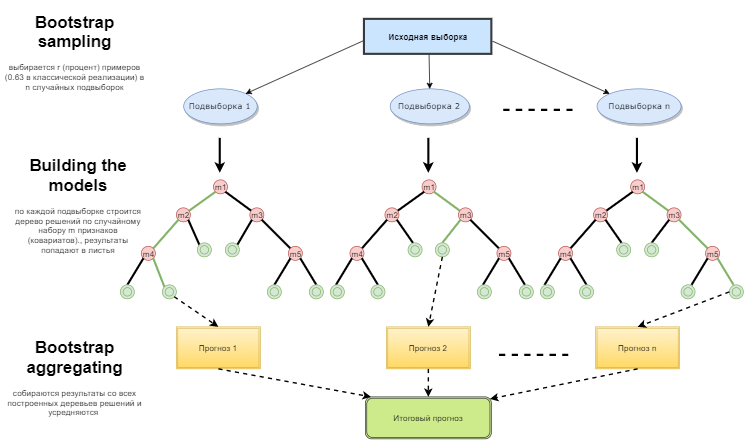

[Источник](https://www.mql5.com/ru/articles/3856)

### Как работает случайный лес

1. **Создание подмножеств данных (Bootstrap Sampling)**

    Для каждого дерева в случайном лесе создаётся случайное подмножество исходных данных с помощью метода **бэггинга** (bagging, bootstrap aggregating). Бэггинг заключается в случайном выборе объектов с возвращением, то есть некоторые объекты могут появляться несколько раз в одном подмножестве, а другие — не появляться вовсе.
   
2. **Случайный выбор признаков (Feature Randomness)**

    На каждом этапе построения дерева, при разбиении узла, выбирается случайное подмножество признаков вместо использования всех признаков. Это уменьшает корреляцию между деревьями, делая их более независимыми и разнообразными.

3. **Построение множества деревьев решений**

    Для каждого случайного подмножества данных строится дерево решений. Каждое дерево строится независимо от других, и процесс не ограничен по глубине, что приводит к созданию "глубоких" деревьев, способных идеально подстраиваться под данные в подмножестве (но не на всем наборе данных).

4. **Объединение предсказаний**

    Для задачи классификации каждый объект проходит через все деревья, и для него возвращаются предсказания всех деревьев. Финальное решение принимается методом **большинства голосов**: класс, который был выбран большинством деревьев, назначается финальным предсказанием. Для задачи регрессии объединение происходит с помощью усреднения значений, предсказанных всеми деревьями.

### Классификация с помощью случайного леса

Для классификации можно использовать [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) из `sklearn`

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Загрузка данных
penguins = sns.load_dataset("penguins").dropna()

# Выберем признаки (features) и целевую переменную (target)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим и обучим модель случайного леса для классификации
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Предскажем классы на тестовой выборке
y_pred = clf.predict(X_test)

# Составим отчет
report = classification_report(y_test, y_pred)
print("Classificaion report:")
print(report)


Classificaion report:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



### Регрессия с помощью случайного леса

Для регрессии можно использовать [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) из `sklearn`

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
tips = sns.load_dataset("tips")

# Выберем признаки (features) и целевую переменную (target)
# Признаки: общий счёт и количество человек за столом
X = tips[['total_bill', 'size']]

# Целевая переменная: чаевые
y = tips['tip']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим и обучим модель случайного леса для регрессии
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Предскажем значения чаевых для тестовой выборки
y_pred = reg.predict(X_test)

# Оценим модель с помощью среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")


Среднеквадратичная ошибка (MSE): 0.98


## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

Выполните классификацию на датасете `titanic` с помощью дерева решений.

Загрузим датасет `titanic`

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Загрузка датасета "titanic"
data = sns.load_dataset("titanic")
data

Реализуем функцию предобработки данных, которая выполняет ипьютинг, удаление строк с пустыми значениями, и энкодинг

In [ ]:
# Импортируйте нужны библиотеки

# Фукнция для подготовки данных: выполняет ипьютинг, удаление строк с пустыми значениями, и энкодинг
def preprocess_data(data):
    # Выполните нужные операции
    ...

    return X, y

Разделим датасет и применим функцию предобработки

In [ ]:
# Разделите датасет на тренировочный и тестовый датасеты и примените функцию предобработки
...

Обучим и протестируем дерево решений

In [ ]:
# Обучите дерево решений и покажите classification report
...

Обучим и протестируем случайный лес

In [ ]:
# Обучите случайный лес и покажите classification report
...

## Упражнение 2

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

Обучите дерево решений и случайный лес на датасете `tips` и посчитайте для них MSE.

In [ ]:
# Импортируйте нужные библиотеки
import seaborn as sns
...

# Загрузка датасета "tips"
data = sns.load_dataset("tips")

# Разделяем признаки на численные и категориальные
...

# Энкодим категориальные признаки
...

# Конкатенируем численные и категориальные признаки
...

# Выбираем целевую переменную
...

# Масштабируем данные
...

# Разделение данных на обучающую и тестовую выборки с параметрами test_size=0.3 и random_state=42
...


Обучим дерево решений и оценим качество

In [ ]:
# Обучение дерева решений
...

# Предсказание на тестовых данных
...

# Оценка качества модели
...

Обучим случайный лес и оценим качество

In [ ]:
# Обучение случайного леса
...

# Предсказание на тестовых данных
...

# Оценка качества модели
...

## Заключение

...